# Spectral Properties

In [2]:
from datetime import timedelta

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import welch
import seaborn as sns

sns.set()

In [3]:
df_dataset = pd.read_csv(
    f"../data/processed/skew_gaussian/k200/delta_window8/processed_daysahead3_R000.csv",
    index_col=0,
)
df_dataset.index = pd.to_datetime(df_dataset.index)
df_dataset.head()

,forward_time,forward_Vp_pred,forward_Vp_obs,forward_mean,forward_sigma,forward_skew,forward_crps
current_time,,,,,,,
2010-01-05 18:00:00,2010-01-08 12:00:00,320.569697,280.69,0.0,85.883217,1.229890,27.328177
2010-01-06 00:00:00,2010-01-08 18:00:00,312.584848,288.52,0.0,88.263538,1.221249,23.228200
2010-01-06 06:00:00,2010-01-09 00:00:00,304.600000,294.91,0.0,94.110607,1.485750,22.390858
2010-01-06 12:00:00,2010-01-09 06:00:00,318.100000,291.04,0.0,98.208772,1.440021,25.906730
2010-01-06 18:00:00,2010-01-09 12:00:00,305.400000,284.74,0.0,99.319037,1.414231,24.918707


In [6]:
# sampling frequency (Hz)
# infer sampling interval from the index
dt = (df_dataset.index[1] - df_dataset.index[0]).total_seconds() / timedelta(
    days=27
).total_seconds()
fs = 1.0 / dt

# compute PSD with Welch’s method
freqs, psd = welch(df_dataset["forward_sigma"], fs=fs, nperseg=256)

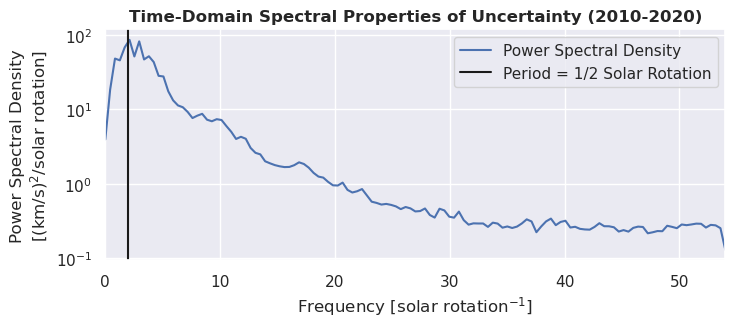

In [7]:
# plot
plt.figure(figsize=(8, 3))
plt.semilogy(freqs, psd, label="Power Spectral Density")  # semilog-y is common for PSD
plt.title(
    "Time-Domain Spectral Properties of Uncertainty (2010-2020)", fontweight="bold"
)
plt.xlabel("Frequency [solar rotation$^{-1}$]")
plt.ylabel("Power Spectral Density\n[(km/s)$^2$/solar rotation]")
plt.axvline(2, color="k", label="Period = 1/2 Solar Rotation")
plt.xlim(0, freqs.max())
plt.legend()
plt.savefig("../plots/spectral_properties.png", dpi=300)